# Analysis of HAFT for each second

### target is CHE_FIGN;  is discrete or categorical variable

### what factor affecting target to change



In [1]:
# CHE_FIGN
# 0.0    208097
# 1.0        14
# 9.0         1
# Name: CHE_FIGN_1, dtype: int64

In [2]:
# BLOWRPWM
# CHE_FCDV
# CHE_BPDV
# FLAMETST
# FLAME_ON
# C_HEALTH
# ALARM_01
# ALARM_02
# ALARM_03
# ALARM_04
# FLAMECUR
# FANSPEED
# VLVSTATE
# GASVALVE
# S3_EXPRS
# S2_INPRS
# S1_AIRFL
# TANKTEMP
# CHE_FIGN
# CHE_BMIN
# INLTTEMP

In [3]:
# Required Imports
import glob
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#creating dataframe df1 of "L1"
df1 = pd.concat(map(pd.read_csv, glob.glob('dataL1/*.csv')))

C:\Users\muhammad.tahir.ctr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
#readong first 5 rows of "L1"
df1.head()

,Time,Date,MODEL_ID,WHTRENAB,WHTRSETP,WHTRDIFF,RESDIFFM,VLVSTATE,TANKTEMP,FLUETEMP,...,FLAMECUR,FANSPEED,OCCUPIED,C_HEALTH,T_HEALTH,CHE_FIGN,CHE_SIGN,FLOW_GPM,ALARMS01,SW_VERSN
0,11:17:48 AM,10/13/2021,56,0,140,8.0,0,1.0,82.8,79.0,...,0.0,0.0,1.0,100.0,100.0,17.0,8.0,0.0,,WH-DRG1-00-01-00
1,11:17:50 AM,10/13/2021,56,0,140,8.0,0,1.0,82.8,78.9,...,0.0,0.0,1.0,100.0,100.0,17.0,8.0,0.0,,WH-DRG1-00-01-00
2,11:17:51 AM,10/13/2021,56,0,140,8.0,0,1.0,82.8,78.9,...,0.0,0.0,1.0,100.0,100.0,17.0,8.0,0.0,,WH-DRG1-00-01-00
3,11:17:52 AM,10/13/2021,56,0,140,8.0,0,1.0,82.8,78.9,...,0.0,0.0,1.0,100.0,100.0,17.0,8.0,0.0,,WH-DRG1-00-01-00
4,11:17:53 AM,10/13/2021,56,0,140,8.0,0,1.0,82.8,78.9,...,0.0,0.0,1.0,100.0,100.0,17.0,8.0,0.0,,WH-DRG1-00-01-00


In [6]:
# looking at null values and data types of each column for "NL I09"
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344854 entries, 0 to 51232
Data columns (total 26 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Time      1344854 non-null  object 
 1   Date      1344854 non-null  object 
 2   MODEL_ID  1344854 non-null  int64  
 3   WHTRENAB  1344854 non-null  int64  
 4   WHTRSETP  1344854 non-null  int64  
 5   WHTRDIFF  1344854 non-null  float64
 6   RESDIFFM  1344854 non-null  int64  
 7   VLVSTATE  1344853 non-null  float64
 8   TANKTEMP  1344854 non-null  object 
 9   FLUETEMP  1344853 non-null  float64
 10  INLTTEMP  1344853 non-null  float64
 11  S1_AIRFL  1344853 non-null  float64
 12  S2_INPRS  1344853 non-null  float64
 13  S3_EXPRS  1344853 non-null  float64
 14  ECOSTATE  1344853 non-null  float64
 15  GASVALVE  1344853 non-null  float64
 16  FLAMECUR  1344853 non-null  float64
 17  FANSPEED  1344853 non-null  float64
 18  OCCUPIED  1344853 non-null  float64
 19  C_HEALTH  1344853 non-n

In [7]:
df1['ALARMS01'].value_counts()

        1187044
T115     157779
A005         30
Name: ALARMS01, dtype: int64

In [8]:
df1['ALARMS01'].unique()

array(['    ', 'T115', 'A005', nan], dtype=object)

In [9]:
df1.columns

Index(['Time', 'Date', 'MODEL_ID', 'WHTRENAB', 'WHTRSETP', 'WHTRDIFF',
       'RESDIFFM', 'VLVSTATE', 'TANKTEMP', 'FLUETEMP', 'INLTTEMP', 'S1_AIRFL',
       'S2_INPRS', 'S3_EXPRS', 'ECOSTATE', 'GASVALVE', 'FLAMECUR', 'FANSPEED',
       'OCCUPIED', 'C_HEALTH', 'T_HEALTH', 'CHE_FIGN', 'CHE_SIGN', 'FLOW_GPM',
       'ALARMS01', 'SW_VERSN'],
      dtype='object')

In [10]:
df1['date_time'] = df1['Date'] + ' ' + df1['Time']
df1 = df1.set_index('date_time')
df1 = df1.drop(['Date','Time', 'SW_VERSN'], axis=1)
df1.index = pd.to_datetime(df1.index, format='%m/%d/%Y %I:%M:%S %p')
df1 = df1[df1.index.notnull()]
df1 = df1.sort_index()

In [11]:
delta_time = df1.index.to_series().diff()

In [12]:
delta_time.value_counts().nlargest(10)

0 days 00:00:01    1127442
0 days 00:00:02     125870
0 days 00:00:00      89836
0 days 00:00:03       1430
0 days 00:00:04        190
0 days 00:00:05         18
0 days 00:00:07         12
0 days 00:00:06         11
0 days 00:00:08         10
0 days 00:00:09          6
Name: date_time, dtype: int64

In [13]:
delta_time.nlargest(30)

date_time
2021-10-27 12:15:43   3 days 03:14:24
2021-10-22 01:00:12   0 days 00:01:41
2021-10-31 07:04:25   0 days 00:01:41
2021-10-31 20:01:56   0 days 00:01:41
2021-10-18 22:14:38   0 days 00:01:40
2021-10-19 02:24:13   0 days 00:01:40
2021-10-20 22:57:55   0 days 00:01:40
2021-10-22 18:53:11   0 days 00:01:40
2021-10-30 12:25:27   0 days 00:01:40
2021-10-19 14:24:24   0 days 00:00:37
2021-10-27 17:12:49   0 days 00:00:30
2021-10-18 14:12:11   0 days 00:00:28
2021-10-19 14:23:45   0 days 00:00:24
2021-10-22 09:50:24   0 days 00:00:22
2021-10-19 14:27:04   0 days 00:00:20
2021-10-22 11:32:03   0 days 00:00:19
2021-10-22 11:42:04   0 days 00:00:18
2021-10-19 14:26:29   0 days 00:00:17
2021-10-19 14:44:21   0 days 00:00:17
2021-10-19 14:33:24   0 days 00:00:16
2021-10-19 14:39:55   0 days 00:00:16
2021-10-20 01:37:09   0 days 00:00:16
2021-10-19 14:44:53   0 days 00:00:14
2021-10-19 13:51:47   0 days 00:00:12
2021-10-22 11:32:22   0 days 00:00:12
2021-10-19 14:45:19   0 days 00:00:11
20

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1344854 entries, 2021-10-13 11:17:48 to 2021-11-01 15:28:10
Data columns (total 23 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   MODEL_ID  1344854 non-null  int64  
 1   WHTRENAB  1344854 non-null  int64  
 2   WHTRSETP  1344854 non-null  int64  
 3   WHTRDIFF  1344854 non-null  float64
 4   RESDIFFM  1344854 non-null  int64  
 5   VLVSTATE  1344853 non-null  float64
 6   TANKTEMP  1344854 non-null  object 
 7   FLUETEMP  1344853 non-null  float64
 8   INLTTEMP  1344853 non-null  float64
 9   S1_AIRFL  1344853 non-null  float64
 10  S2_INPRS  1344853 non-null  float64
 11  S3_EXPRS  1344853 non-null  float64
 12  ECOSTATE  1344853 non-null  float64
 13  GASVALVE  1344853 non-null  float64
 14  FLAMECUR  1344853 non-null  float64
 15  FANSPEED  1344853 non-null  float64
 16  OCCUPIED  1344853 non-null  float64
 17  C_HEALTH  1344853 non-null  float64
 18  T_HEALTH  1344853 non-null  f

In [15]:
df1.head()

,MODEL_ID,WHTRENAB,WHTRSETP,WHTRDIFF,RESDIFFM,VLVSTATE,TANKTEMP,FLUETEMP,INLTTEMP,S1_AIRFL,...,GASVALVE,FLAMECUR,FANSPEED,OCCUPIED,C_HEALTH,T_HEALTH,CHE_FIGN,CHE_SIGN,FLOW_GPM,ALARMS01
date_time,,,,,,,,,,,,,,,,,,,,,
2021-10-13 11:17:48,56,0,140,8.0,0,1.0,82.8,79.0,80.6,1.0,...,0.0,0.0,0.0,1.0,100.0,100.0,17.0,8.0,0.0,
2021-10-13 11:17:50,56,0,140,8.0,0,1.0,82.8,78.9,80.6,1.0,...,0.0,0.0,0.0,1.0,100.0,100.0,17.0,8.0,0.0,
2021-10-13 11:17:51,56,0,140,8.0,0,1.0,82.8,78.9,80.6,1.0,...,0.0,0.0,0.0,1.0,100.0,100.0,17.0,8.0,0.0,
2021-10-13 11:17:52,56,0,140,8.0,0,1.0,82.8,78.9,80.6,1.0,...,0.0,0.0,0.0,1.0,100.0,100.0,17.0,8.0,0.0,
2021-10-13 11:17:53,56,0,140,8.0,0,1.0,82.8,78.9,80.6,1.0,...,0.0,0.0,0.0,1.0,100.0,100.0,17.0,8.0,0.0,


In [16]:
#df1 = df1.drop(['Unnamed: 11'], axis=1)
#df1.info()

In [17]:
#creating dataframe df2 of "L2 files"
df2 =  pd.concat(map(pd.read_csv, glob.glob('dataL2/*.csv')))

In [18]:
df2.head()

,Time,Date,CHE_BMIN,ALARM_01,ALARM_02,ALARM_03,ALARM_04,SW_VERSN
0,11:20:10 AM,10/13/2021,87,,,,,WH-DRG1-00-01-00
1,11:20:11 AM,10/13/2021,87,,,,,WH-DRG1-00-01-00
2,11:20:12 AM,10/13/2021,87,,,,,WH-DRG1-00-01-00
3,11:20:13 AM,10/13/2021,87,,,,,WH-DRG1-00-01-00
4,11:20:14 AM,10/13/2021,87,,,,,WH-DRG1-00-01-00


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344629 entries, 0 to 51539
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Time      1344629 non-null  object
 1   Date      1344629 non-null  object
 2   CHE_BMIN  1344629 non-null  int64 
 3   ALARM_01  1344629 non-null  object
 4   ALARM_02  1344629 non-null  object
 5   ALARM_03  1344629 non-null  object
 6   ALARM_04  1344627 non-null  object
 7   SW_VERSN  1344629 non-null  object
dtypes: int64(1), object(7)
memory usage: 92.3+ MB


In [20]:
#df2['date_time'] = df2['Time'] + ' ' + df2['Date']

In [21]:
df2['date_time'] = df2['Date'] + ' ' + df2['Time']
df2 = df2.set_index('date_time')
df2 = df2.drop(['Time'], axis=1)
df2.index = pd.to_datetime(df2.index, format='%m/%d/%Y %I:%M:%S %p')
df2 = df2[df2.index.notnull()]
df2 = df2.sort_index()

In [22]:
delta_time = df2.index.to_series().diff()

In [23]:
#delta_time = df.index.to_series().diff()

In [24]:
delta_time.value_counts().nlargest(10)

0 days 00:00:01    1162306
0 days 00:00:02     108840
0 days 00:00:00      72062
0 days 00:00:03       1161
0 days 00:00:04        167
0 days 00:00:05         29
0 days 00:00:06         21
0 days 00:00:08          8
0 days 00:00:07          6
0 days 00:00:22          5
Name: date_time, dtype: int64

In [25]:
delta_time.nlargest(30)

date_time
2021-10-27 12:17:44   3 days 03:16:24
2021-10-19 14:27:53   0 days 00:01:43
2021-10-30 12:15:04   0 days 00:01:41
2021-10-30 12:19:48   0 days 00:01:41
2021-10-20 16:14:42   0 days 00:01:40
2021-10-31 05:41:10   0 days 00:01:40
2021-10-31 10:35:26   0 days 00:01:40
2021-10-18 14:12:13   0 days 00:00:28
2021-10-27 17:12:49   0 days 00:00:27
2021-10-19 14:38:13   0 days 00:00:25
2021-10-19 14:22:44   0 days 00:00:22
2021-10-19 14:23:38   0 days 00:00:22
2021-10-19 14:37:12   0 days 00:00:22
2021-10-19 14:44:11   0 days 00:00:22
2021-10-20 01:37:10   0 days 00:00:22
2021-10-15 05:32:02   0 days 00:00:21
2021-10-15 08:11:34   0 days 00:00:21
2021-10-24 06:31:27   0 days 00:00:21
2021-10-19 14:30:34   0 days 00:00:19
2021-10-19 14:39:05   0 days 00:00:18
2021-10-19 14:28:18   0 days 00:00:16
2021-10-22 11:31:56   0 days 00:00:13
2021-10-22 11:32:33   0 days 00:00:12
2021-10-19 14:24:06   0 days 00:00:11
2021-10-28 08:35:05   0 days 00:00:11
2021-10-22 11:41:57   0 days 00:00:10
20

In [26]:
#df2 = df2.drop(['Unnamed: 14'], axis=1)
#df2.info()

In [27]:
#creating dataframe dfflow of "Flow files"
df_flow =  pd.concat(map(pd.read_csv, glob.glob('dataFlow/*.csv')))

In [28]:
df_flow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113615 entries, 0 to 5563
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  113615 non-null  object 
 1   Time                  113615 non-null  object 
 2   Flow_Shower1_GPM      113615 non-null  float64
 3   Flow_BathSink1_GPM    113615 non-null  float64
 4   Flow_Shower2_GPM      113615 non-null  float64
 5   Flow_BathSink2_GPM    113615 non-null  float64
 6   Flow_Shower3_GPM      113615 non-null  float64
 7   Flow_BathSink3_GPM    113615 non-null  float64
 8   Flow_Dishwasher_GPM   113615 non-null  float64
 9   Flow_KitchenSink_GPM  113615 non-null  float64
 10  Flow_Laundry_GPM      113615 non-null  float64
dtypes: float64(9), object(2)
memory usage: 10.4+ MB


In [29]:
#df2.loc[df2['CHE_FIGN_1']=='9']


In [30]:
#df2['CHE_FIGN_2'] = df2['CHE_FIGN_1'].astype(int).diff()

In [31]:
# first combine time and date and then merge on date/time

In [32]:
#df3 = df1.merge(df2, on='date_time', how='inner')
#df3.info()

In [33]:
#df_final = df3.drop(['Unnamed: 11', 'Unnamed: 14', 'Date_x', 'Date_y'], axis=1)
#df_final.info()

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1344854 entries, 2021-10-13 11:17:48 to 2021-11-01 15:28:10
Data columns (total 23 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   MODEL_ID  1344854 non-null  int64  
 1   WHTRENAB  1344854 non-null  int64  
 2   WHTRSETP  1344854 non-null  int64  
 3   WHTRDIFF  1344854 non-null  float64
 4   RESDIFFM  1344854 non-null  int64  
 5   VLVSTATE  1344853 non-null  float64
 6   TANKTEMP  1344854 non-null  object 
 7   FLUETEMP  1344853 non-null  float64
 8   INLTTEMP  1344853 non-null  float64
 9   S1_AIRFL  1344853 non-null  float64
 10  S2_INPRS  1344853 non-null  float64
 11  S3_EXPRS  1344853 non-null  float64
 12  ECOSTATE  1344853 non-null  float64
 13  GASVALVE  1344853 non-null  float64
 14  FLAMECUR  1344853 non-null  float64
 15  FANSPEED  1344853 non-null  float64
 16  OCCUPIED  1344853 non-null  float64
 17  C_HEALTH  1344853 non-null  float64
 18  T_HEALTH  1344853 non-null  f

In [35]:
df_final=df1

In [36]:
df_final['ALARMS01'].unique()

array(['    ', 'T115', 'A005', nan], dtype=object)

In [37]:
df_final['ALARMS01'].value_counts()

        1187044
T115     157779
A005         30
Name: ALARMS01, dtype: int64

In [38]:
# to change labels of "ALARM_01"

ALARMS01_dict = {
    'nan': 'nan',
    '    ': "no_alarm",
    'T115': 'T115',
    'A005': 'A005',
}

df_final["ALARMS01"] = df_final["ALARMS01"].map(ALARMS01_dict)

In [39]:
df_final['ALARMS01'].value_counts()

no_alarm    1187044
T115         157779
A005             30
Name: ALARMS01, dtype: int64

In [40]:
df_final.isnull().sum()

MODEL_ID    0
WHTRENAB    0
WHTRSETP    0
WHTRDIFF    0
RESDIFFM    0
VLVSTATE    1
TANKTEMP    0
FLUETEMP    1
INLTTEMP    1
S1_AIRFL    1
S2_INPRS    1
S3_EXPRS    1
ECOSTATE    1
GASVALVE    1
FLAMECUR    1
FANSPEED    1
OCCUPIED    1
C_HEALTH    1
T_HEALTH    1
CHE_FIGN    1
CHE_SIGN    1
FLOW_GPM    1
ALARMS01    1
dtype: int64

In [41]:
#TANKTEMP_1
df_final['TANKTEMP'].value_counts()

133.6               19172
133.2               18448
134.0               17815
134.4               17702
133.5               17624
                    ...  
96.9                    3
98.4                    3
102.9                   3
94.4                    3
WH-DRG1-00-01-00        1
Name: TANKTEMP, Length: 595, dtype: int64

In [42]:
df_final = df_final.dropna()

In [43]:
#df_final.drop(df_final[df_final['TANKTEMP_1']=='---'].index, inplace = True)

In [44]:
df_final['TANKTEMP'] = df_final['TANKTEMP'].astype(float)

<ipython-input-44-564d75d9a674>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['TANKTEMP'] = df_final['TANKTEMP'].astype(float)


In [45]:
# df_final['TANKTEMP_1'].min()

In [46]:
#CHE_FIGN_1
df_final['CHE_FIGN'].value_counts()

17.0    1344853
Name: CHE_FIGN, dtype: int64

In [47]:
#df_final.drop(df_final[df_final['CHE_FIGN_1']=='---'].index, inplace = True)

In [48]:
#df_final['CHE_FIGN_1'] = df_final['CHE_FIGN_1'].astype(int)

In [49]:
df_final['CHE_FIGN'].unique()

array([17.])

In [50]:
df_final['CHE_FIGN'].value_counts()

17.0    1344853
Name: CHE_FIGN, dtype: int64

In [51]:
df_final['CHE_FIGN'].isnull().sum()

0

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1344853 entries, 2021-10-13 11:17:48 to 2021-11-01 15:28:10
Data columns (total 23 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   MODEL_ID  1344853 non-null  int64  
 1   WHTRENAB  1344853 non-null  int64  
 2   WHTRSETP  1344853 non-null  int64  
 3   WHTRDIFF  1344853 non-null  float64
 4   RESDIFFM  1344853 non-null  int64  
 5   VLVSTATE  1344853 non-null  float64
 6   TANKTEMP  1344853 non-null  float64
 7   FLUETEMP  1344853 non-null  float64
 8   INLTTEMP  1344853 non-null  float64
 9   S1_AIRFL  1344853 non-null  float64
 10  S2_INPRS  1344853 non-null  float64
 11  S3_EXPRS  1344853 non-null  float64
 12  ECOSTATE  1344853 non-null  float64
 13  GASVALVE  1344853 non-null  float64
 14  FLAMECUR  1344853 non-null  float64
 15  FANSPEED  1344853 non-null  float64
 16  OCCUPIED  1344853 non-null  float64
 17  C_HEALTH  1344853 non-null  float64
 18  T_HEALTH  1344853 non-null  f

In [53]:
df_final.columns

Index(['MODEL_ID', 'WHTRENAB', 'WHTRSETP', 'WHTRDIFF', 'RESDIFFM', 'VLVSTATE',
       'TANKTEMP', 'FLUETEMP', 'INLTTEMP', 'S1_AIRFL', 'S2_INPRS', 'S3_EXPRS',
       'ECOSTATE', 'GASVALVE', 'FLAMECUR', 'FANSPEED', 'OCCUPIED', 'C_HEALTH',
       'T_HEALTH', 'CHE_FIGN', 'CHE_SIGN', 'FLOW_GPM', 'ALARMS01'],
      dtype='object')

In [54]:
df_final['WHTRENAB'].unique()

array([0, 1], dtype=int64)

In [55]:
df_final['WHTRENAB'].value_counts()

1    1343883
0        970
Name: WHTRENAB, dtype: int64

In [56]:
df_final['WHTRSETP'].unique()

array([140], dtype=int64)

In [57]:
df_final['WHTRSETP'].value_counts()

140    1344853
Name: WHTRSETP, dtype: int64

In [58]:
df_final['WHTRDIFF'].unique()

array([8.])

In [59]:
df_final['WHTRDIFF'].value_counts()

8.0    1344853
Name: WHTRDIFF, dtype: int64

In [60]:
df_final['RESDIFFM'].unique()

array([0], dtype=int64)

In [61]:
df_final['RESDIFFM'].value_counts()

0    1344853
Name: RESDIFFM, dtype: int64

In [62]:
df_final['S2_INPRS'].unique()

array([0.])

In [63]:
df_final['S2_INPRS'].value_counts()

0.0    1344853
Name: S2_INPRS, dtype: int64

In [64]:
df_final['S3_EXPRS'].unique()

array([0.])

In [65]:
df_final['S3_EXPRS'].value_counts()

0.0    1344853
Name: S3_EXPRS, dtype: int64

In [66]:
df_final['FLOW_GPM'].unique()

array([0.])

In [67]:
df_final['FLOW_GPM'].value_counts()

0.0    1344853
Name: FLOW_GPM, dtype: int64

In [68]:
df_final = df_final.drop(['MODEL_ID', 'WHTRENAB', 'WHTRSETP', 'WHTRDIFF', 
                          'RESDIFFM', 'S2_INPRS', 'S3_EXPRS', 'FLOW_GPM'], axis=1)

In [69]:
df_final['ECOSTATE'].unique()

array([0.])

In [70]:
df_final['ECOSTATE'].value_counts()

0.0    1344853
Name: ECOSTATE, dtype: int64

In [71]:
df_final['CHE_FIGN'].unique()

array([17.])

In [72]:
df_final['CHE_FIGN'].value_counts()

17.0    1344853
Name: CHE_FIGN, dtype: int64

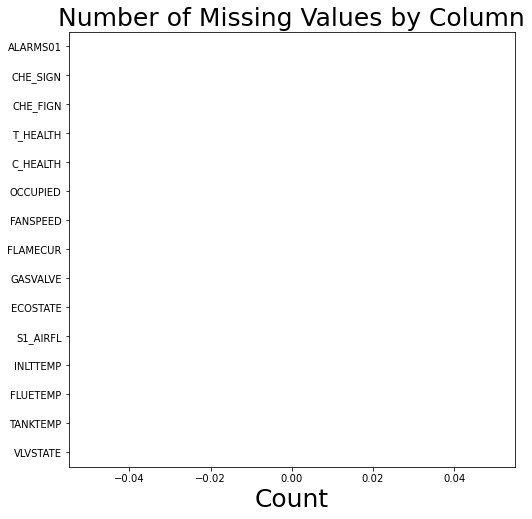

In [73]:
# bar chart to see missing visual in df_data
plt.figure(figsize = (8,8))

df_final.isnull().sum().plot(kind = 'barh')
plt.title('Number of Missing Values by Column', size = 25)
plt.xlabel('Count', size = 25);

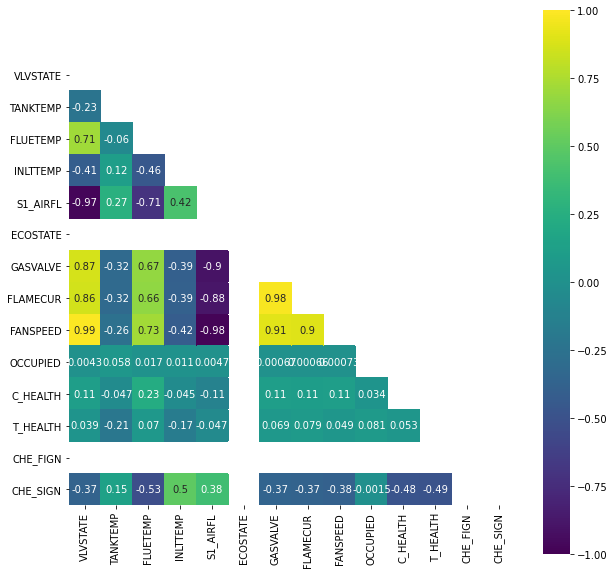

In [74]:
#visual of correlation between fields or columns
plt.figure(figsize=(10, 10))
mask = np.zeros_like(df_final.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_final.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);
#sns.heatmap(df_final.corr(), annot = True, vmin=-1, vmax=1, center= 0);

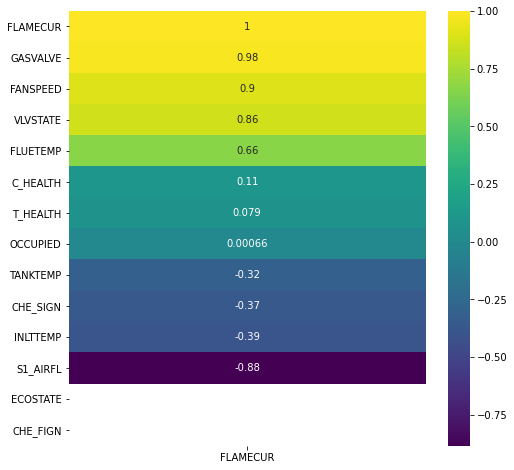

In [75]:
#visual of correlation between fields or columns
plt.figure(figsize=(8,8))

sns.heatmap(df_final.corr()[['FLAMECUR']].sort_values('FLAMECUR', ascending=False), annot=True, cmap='viridis');

In [76]:
#numeric data from df_data
df_numeric = df_final._get_numeric_data()

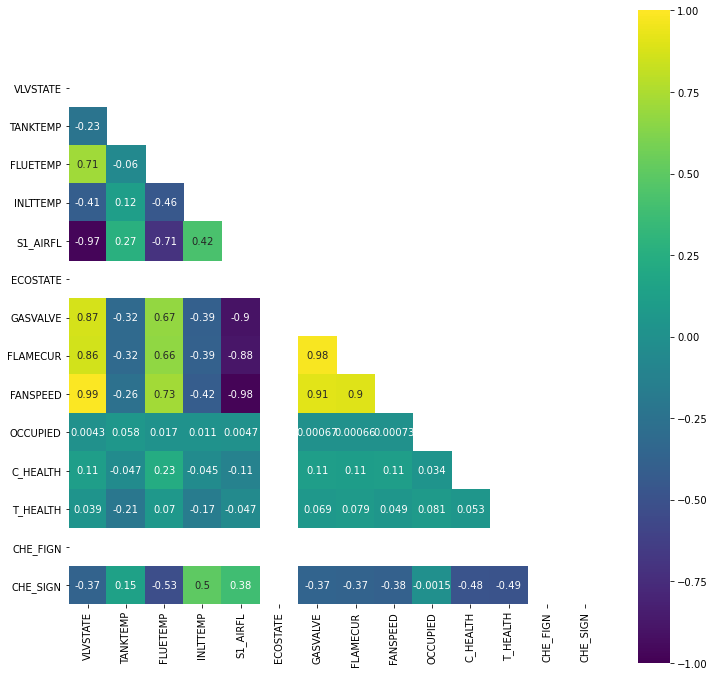

In [77]:
plt.figure(figsize=(12, 12))
mask = np.zeros_like(df_numeric.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_numeric.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);


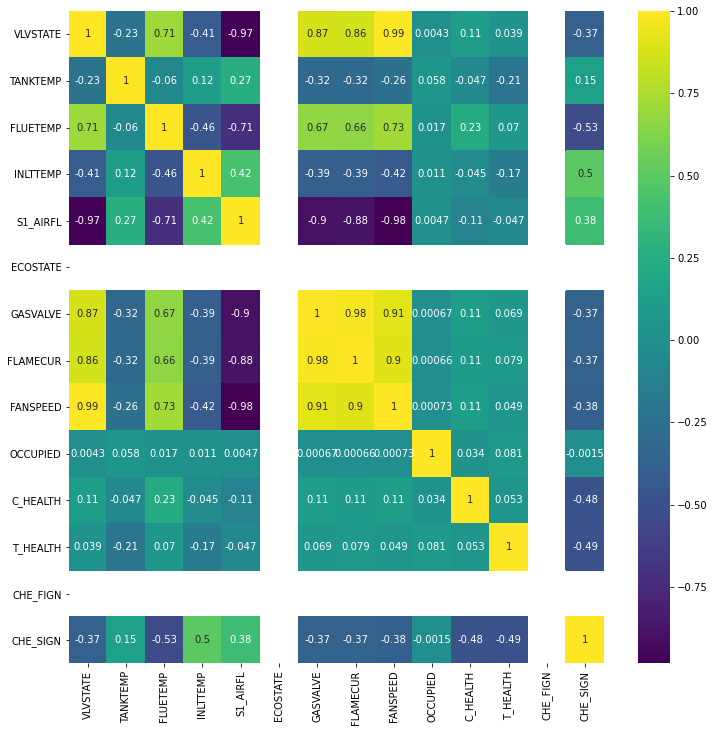

In [78]:
plt.figure(figsize=(12,12))

sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis');

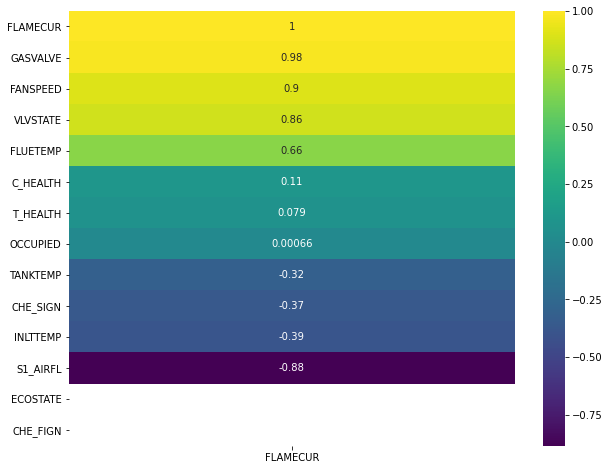

In [79]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['FLAMECUR']].sort_values('FLAMECUR', ascending=False), annot=True, cmap='viridis');

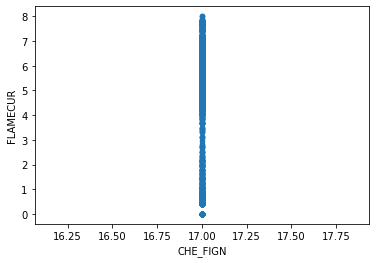

In [80]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df_final.plot(kind='scatter', x = 'CHE_FIGN', y='FLAMECUR');

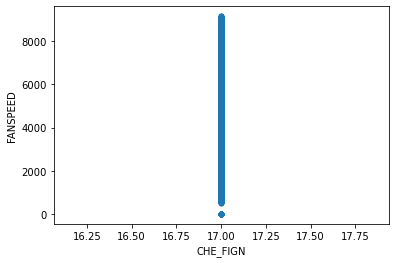

In [81]:
#Scatter plot to see relation between CHE_FIGN and CHE_BMIN
df_final.plot(kind='scatter', x = 'CHE_FIGN', y='FANSPEED');

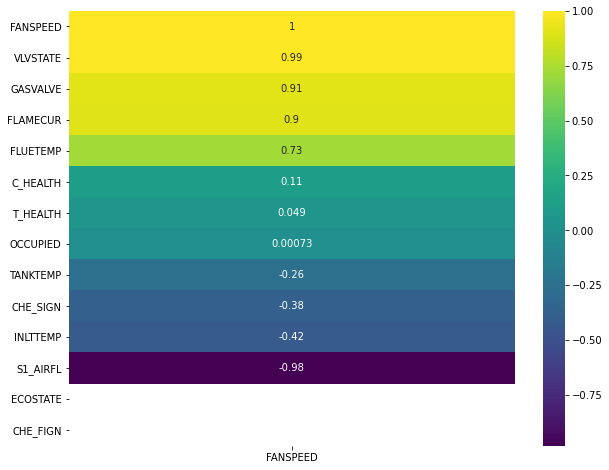

In [82]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['FANSPEED']].sort_values('FANSPEED', ascending=False), annot=True, cmap='viridis');

In [83]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1344853 entries, 2021-10-13 11:17:48 to 2021-11-01 15:28:10
Data columns (total 15 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   VLVSTATE  1344853 non-null  float64
 1   TANKTEMP  1344853 non-null  float64
 2   FLUETEMP  1344853 non-null  float64
 3   INLTTEMP  1344853 non-null  float64
 4   S1_AIRFL  1344853 non-null  float64
 5   ECOSTATE  1344853 non-null  float64
 6   GASVALVE  1344853 non-null  float64
 7   FLAMECUR  1344853 non-null  float64
 8   FANSPEED  1344853 non-null  float64
 9   OCCUPIED  1344853 non-null  float64
 10  C_HEALTH  1344853 non-null  float64
 11  T_HEALTH  1344853 non-null  float64
 12  CHE_FIGN  1344853 non-null  float64
 13  CHE_SIGN  1344853 non-null  float64
 14  ALARMS01  1344853 non-null  object 
dtypes: float64(14), object(1)
memory usage: 164.2+ MB


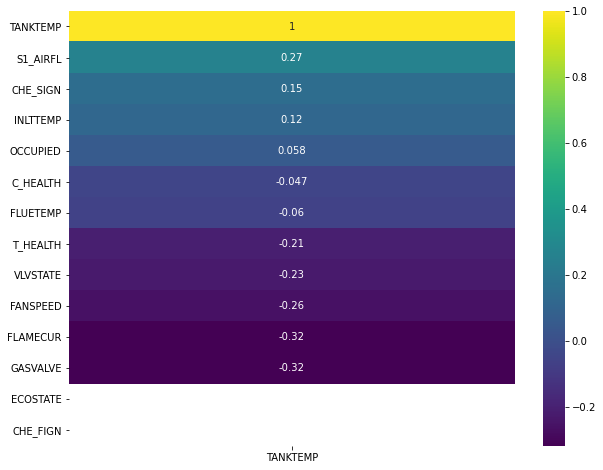

In [84]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['TANKTEMP']].sort_values('TANKTEMP', ascending=False), annot=True, cmap='viridis');

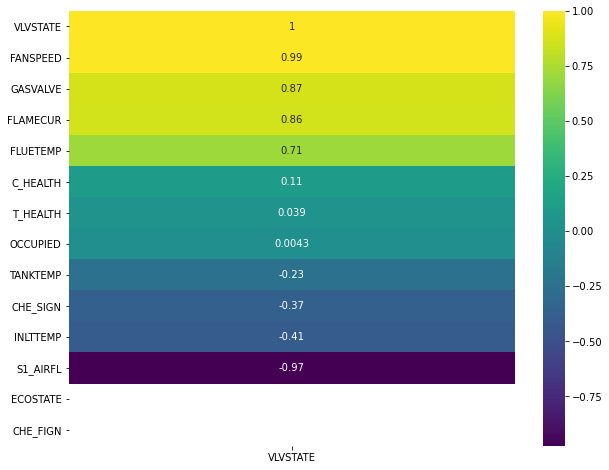

In [85]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['VLVSTATE']].sort_values('VLVSTATE', ascending=False), annot=True, cmap='viridis');

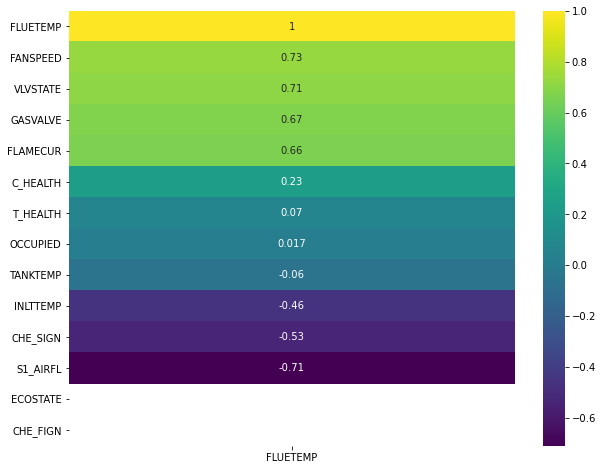

In [86]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['FLUETEMP']].sort_values('FLUETEMP', ascending=False), annot=True, cmap='viridis');

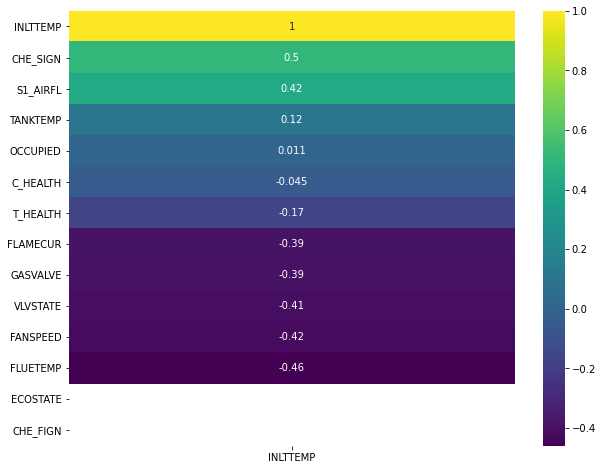

In [87]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['INLTTEMP']].sort_values('INLTTEMP', ascending=False), annot=True, cmap='viridis');

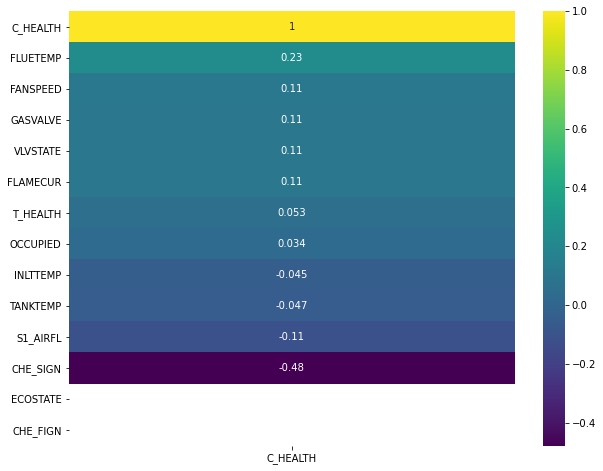

In [88]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['C_HEALTH']].sort_values('C_HEALTH', ascending=False), annot=True, cmap='viridis');

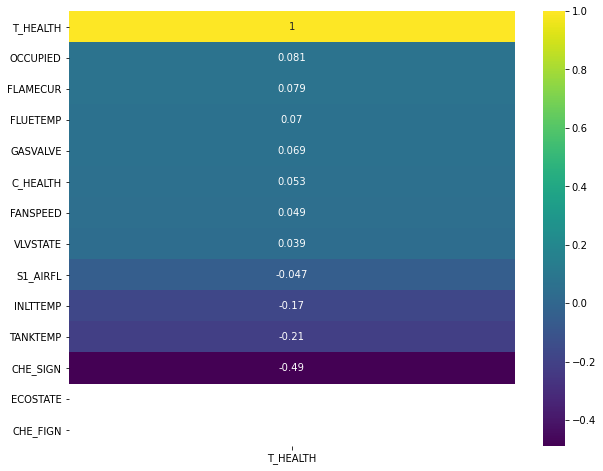

In [89]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['T_HEALTH']].sort_values('T_HEALTH', ascending=False), annot=True, cmap='viridis');